**News Category Classification Problem**

Here we want to do a news category classification. We will use bag of n-grams and traing a machine learning model that can categorize any news into one of the following categories,

1. BUSINESS
2. SPORTS
3. CRIME
4. SCIENCE
5. Dataset

Dataset Credits: https://www.kaggle.com/code/hengzheng/news-category-classifier-val-acc-0-65

This data consists of two columns.
  - Text
  - Category
Text is a news article
Category can be one of these 4: 'BUSINESS', 'SPORTS', 'CRIME', 'SCIENCE', to keep things simple I trimmed additional categories from the original dataset

In [17]:
import pandas as pd
df = pd.read_json('news_dataset.json')
df.shape

(12695, 2)

In [18]:
df.head()

,text,category
0,Watching Schrödinger's Cat Die University of C...,SCIENCE
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS
3,These Roads Could Recharge Your Electric Car A...,BUSINESS
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME


In [19]:
df['text'][0]

"Watching Schrödinger's Cat Die University of California, Berkeley, physicists have, for the first time, showed that, in fact, it's possible to follow the metaphorical cat through the whole process, whether he lives or dies in the end."

In [20]:
df['category'].value_counts()

BUSINESS    4254
SPORTS      4167
CRIME       2893
SCIENCE     1381
Name: category, dtype: int64

**Handle class imbalance**

As you can see above, SCIENCE category has almost 1/3rd data samples compared to BUSINESS and SPORTS categories. I initially trained a model without handling the imbalanced I saw a lower f1-score for SCIENCE category. Hence we need to address this imbalanced.

There are various ways of handling class imbalance which I have discussed in this video: https://www.youtube.com/watch?v=JnlM4yLFNuo

Out of those techniques, I will use undersampling technique here.

In undersampling, we take a minor class and sample those many samples from other classes, this means we are not utilizing all the data samples for training and in ML world - Not using all the data for training is considered a SIN! 😵 In real life, you are advised to use a technique such as SMOTE so that you can utilize all of your dataset for the training but since this tutorial is more about bag of n-grams then class imbalance itself, I'd go with a simple technique of undersampling.

In [21]:
min_samples = 1381

df_bussiness = df[df['category'] == 'BUSINESS'].sample(min_samples, random_state=2022)
df_sports = df[df['category'] == 'SPORTS'].sample(min_samples, random_state=2022)
df_crime = df[df['category'] == 'CRIME'].sample(min_samples, random_state=2022)
df_science = df[df['category'] == 'SCIENCE'].sample(min_samples, random_state=2022)

In [22]:
df_balanced = pd.concat([df_bussiness, df_sports, df_crime, df_science], axis=0)
df_balanced

,text,category
11967,GCC Business Leaders Remain Confident in the F...,BUSINESS
2912,From the Other Side; an Honest Review from Emp...,BUSINESS
3408,"Mike McDerment, CEO of FreshBooks, Talks About...",BUSINESS
502,How to Market Your Business While Traveling th...,BUSINESS
5279,How to Leverage Intuition in Decision-making I...,BUSINESS
...,...,...
2178,Aquarium To Monitor Animals' Behavior Changes ...,SCIENCE
5682,How Google Glass Could Save Lives In The Hospi...,SCIENCE
1643,Honda's Gravity Modification Research For us A...,SCIENCE
11428,EVERYONE Loves Alternative Facts THE POWER OF ...,SCIENCE


In [24]:
df_balanced['category'].value_counts()

SCIENCE     1381
CRIME       1381
SPORTS      1381
BUSINESS    1381
Name: category, dtype: int64

Convert text category to a number

In [25]:
df_balanced['category_num'] = df_balanced['category'].map({
    'BUSINESS' : 0, 
    'SPORTS' : 1, 
    'CRIME' : 2, 
    'SCIENCE' : 3
})

In [26]:
df_balanced

,text,category,category_num
11967,GCC Business Leaders Remain Confident in the F...,BUSINESS,0
2912,From the Other Side; an Honest Review from Emp...,BUSINESS,0
3408,"Mike McDerment, CEO of FreshBooks, Talks About...",BUSINESS,0
502,How to Market Your Business While Traveling th...,BUSINESS,0
5279,How to Leverage Intuition in Decision-making I...,BUSINESS,0
...,...,...,...
2178,Aquarium To Monitor Animals' Behavior Changes ...,SCIENCE,3
5682,How Google Glass Could Save Lives In The Hospi...,SCIENCE,3
1643,Honda's Gravity Modification Research For us A...,SCIENCE,3
11428,EVERYONE Loves Alternative Facts THE POWER OF ...,SCIENCE,3


**Buliding a model with original text (no pre processing)**

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_balanced['text'], df_balanced['category_num'], test_size=0.2,
                                                   random_state=2022, stratify=df_balanced['category_num'])

In [28]:
X_train.shape

(4419,)

In [29]:
X_test.shape

(1105,)

In [30]:
X_train.head()

7589     Ovulating Women Prefer Images of Penetration O...
10442    Scientists Discover Spooky Influence On Baby N...
8792     Olympic Race Walker Steps Up To Propose To His...
1733     Beloved Bipedal Bear Named Pedals Believed Kil...
2526     Elizabeth Smart Gave Birth To Baby Girl, Fathe...
Name: text, dtype: object

**Attempt 1 : Use 1-gram which is nothing but a Bag Of Words (BOW) model**

In [31]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1,1))),
    ('Multi NB', MultinomialNB())
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.87      0.81       276
           1       0.93      0.80      0.86       277
           2       0.83      0.90      0.86       276
           3       0.90      0.80      0.85       276

    accuracy                           0.84      1105
   macro avg       0.85      0.84      0.84      1105
weighted avg       0.85      0.84      0.84      1105



In [32]:
X_test[:5]

3716     African Nation Slaps Exxon With Fine Nearly 7 ...
608      These Cringe-Worthy Stories Show It Can Be Har...
11172    LISTEN: The Accidental Discovery That Proved T...
1346     Build Loyalty -- The Cost -- $00.00 Remember y...
1356     Man Killed By Michigan Police Wasn't Targeting...
Name: text, dtype: object

In [33]:
y_test[:5]

3716     0
608      3
11172    3
1346     0
1356     2
Name: category_num, dtype: int64

In [34]:
y_pred[:5]

array([0, 3, 3, 0, 2], dtype=int64)

**Attempt 2 : Use 1-gram and bigrams**

In [36]:
clf = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1,2))),
    ('Multi NB', MultinomialNB())
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.90      0.78       276
           1       0.95      0.74      0.83       277
           2       0.82      0.88      0.85       276
           3       0.92      0.78      0.84       276

    accuracy                           0.82      1105
   macro avg       0.85      0.82      0.83      1105
weighted avg       0.85      0.82      0.83      1105



**Attempt 3 : Use 1-gram to trigrams**

In [37]:
clf = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1,3))),
    ('Multi NB', MultinomialNB())
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.91      0.77       276
           1       0.96      0.73      0.83       277
           2       0.83      0.87      0.85       276
           3       0.93      0.76      0.83       276

    accuracy                           0.82      1105
   macro avg       0.84      0.82      0.82      1105
weighted avg       0.84      0.82      0.82      1105



### Use text pre-processing to remove stop words, punctuations and apply lemmatization

In [38]:
df_balanced['preprocessed_text'] = df_balanced['text'].apply(preprocess)

In [39]:
df_balanced.head()

,text,category,category_num,preprocessed_text
11967,GCC Business Leaders Remain Confident in the F...,BUSINESS,0,gcc Business leader remain Confident face Regi...
2912,From the Other Side; an Honest Review from Emp...,BUSINESS,0,Honest Review employee wake morning love impor...
3408,"Mike McDerment, CEO of FreshBooks, Talks About...",BUSINESS,0,Mike McDerment ceo FreshBooks talk give build ...
502,How to Market Your Business While Traveling th...,BUSINESS,0,market business travel World recently amazing ...
5279,How to Leverage Intuition in Decision-making I...,BUSINESS,0,Leverage intuition decision making feel safe r...


**Build a model with pre processed text**

In [40]:
X_train, X_test, y_train, y_test = train_test_split(df_balanced['preprocessed_text'], df_balanced['category_num'], test_size=0.2,
                                                   random_state=2022, stratify=df_balanced['category_num'])

In [41]:
clf = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1,1))),
    ('Multi NB', MultinomialNB())
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       276
           1       0.92      0.82      0.86       277
           2       0.82      0.91      0.86       276
           3       0.90      0.82      0.86       276

    accuracy                           0.86      1105
   macro avg       0.86      0.86      0.86      1105
weighted avg       0.86      0.86      0.86      1105



In [42]:
clf = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1,2))),
    ('Multi NB', MultinomialNB())
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       276
           1       0.92      0.83      0.87       277
           2       0.83      0.92      0.87       276
           3       0.91      0.81      0.86       276

    accuracy                           0.86      1105
   macro avg       0.87      0.86      0.86      1105
weighted avg       0.87      0.86      0.86      1105



In [43]:
clf = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1,3))),
    ('Multi NB', MultinomialNB())
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       276
           1       0.93      0.83      0.87       277
           2       0.83      0.92      0.87       276
           3       0.91      0.81      0.86       276

    accuracy                           0.86      1105
   macro avg       0.87      0.86      0.86      1105
weighted avg       0.87      0.86      0.86      1105



In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[244,   7,  15,  10],
       [ 11, 229,  29,   8],
       [ 16,   1, 254,   5],
       [ 34,  10,   8, 224]], dtype=int64)

Text(69.0, 0.5, 'Truth')

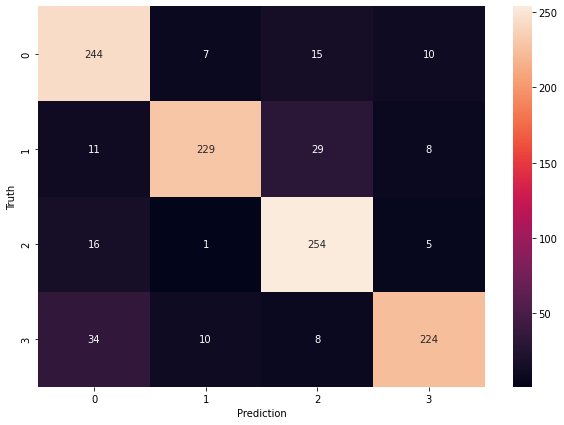

In [46]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')